***Linear Regression Model using the function y=mx +c ***

In [8]:
import torch
start =0
end = 1
a = 0.5
b = 0.3
step = 0.01
X=torch.arange(start, end, step).unsqueeze(dim=1)
#print(X.reshape(shape=(25,4)))
Y= a *X +b 
split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
Y_train = Y[:split]
Y_test = Y[split:]
print(X_test.shape, X_train.shape, Y_test.shape, Y_train.shape)
#len(X)
#len(Y)
#X[:]

torch.Size([20, 1]) torch.Size([80, 1]) torch.Size([20, 1]) torch.Size([80, 1])


In [1]:
import matplotlib.pyplot as plt
def plot_predictions(X_train,X_test,Y_train,Y_test, predictions=None):
    """
    Plot the Training, Test and Predictions in scatter graph
    """
    # plot the training data in blue
    plt.scatter(X_train, Y_train,s=7,c='b',label="Training Data")

    #plot the test data in gree
    plt.scatter(X_test, Y_test,s=7,c='g',label="Test Data")

    if predictions is not None:
        plt.scatter(X_test, predictions, s=7, c='r', label="Predictions")

    plt.legend(prop={"size":14})

#plot_predictions(X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)


In [11]:
from torch import nn


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float32))
        self.bias=nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float32))
        
        ## define forward function to define the model (Function that implements the linear regression)
    def forward(self,x: torch.tensor) -> torch.tensor:
        return x * self.weights + self.bias



In [46]:
## Create an instance of the model
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

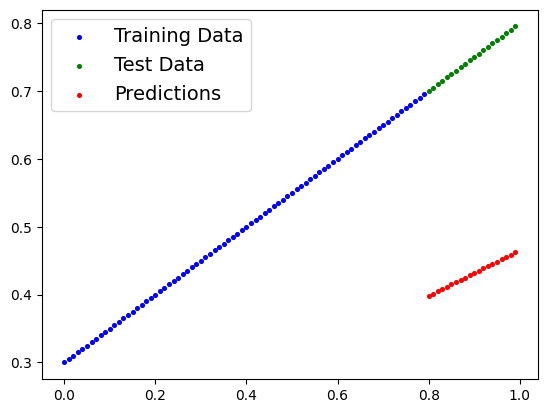

In [14]:
with torch.inference_mode():
    Y_pred= model_0.forward(X_test)

Y_pred

plot_predictions(X_train,X_test,Y_train,Y_test,predictions=Y_pred)

In [11]:
## Setup a loss function and optimizer to train the model so that the predictions look better. 
## Parameter values get optimized using the training data

loss_function = nn.L1Loss()  ## -> Checks how wrong the model or measures the model accuracy using loss function

optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01)  # Implements stochastic gradient descent as the optimizer to adjust the parameters of the model






NameError: name 'model_0' is not defined

Training and Testing Loop process

In [49]:
epoch_count=[]
training_loss_values=[]
testing_loss_values=[]

In [50]:
epochs = 100 # Hyper parameter that data scientist sets for looping through the data for caluclating the loss

# Step 0 of the training loop
for epoch in range(epochs):
    # Set the model in the training mode 
    model_0.train() # Training mode sets the model parameters with require grad to True 

    # Step 1 -> Do the forward process to implement the LR
    Y_pred= model_0.forward(X_train)

    # Step 2 -> Calculate the loss of the prediction using the loss function
    loss = loss_function(Y_pred, Y_train)
    print(f"Loss is {loss}")

    # Step 3 -> Set the Gradient of the optimizer to zero as the process in loop
    optimizer.zero_grad()

    # Step 4 -> Do the backward propogation on the loss w.r.t parameters (calculate gradient of each parameter)
    loss.backward()

    # Step 5 -> Step the optimizer process to perform gradient descent
    optimizer.step()

    # Step 6 -> Change the model to evaluation mode and this turns off setting in the model not needed for eval
    model_0.eval()

    # Step 7 -> Change to torch inference mode  -> This will turn off grad descent
    with torch.inference_mode():
        Y_pred = model_0(X_test)  # -> Calculate the prediction using forward function

        test_loss = loss_function(Y_pred, Y_test)
    
    if epoch % 50 == 0:
        epoch_count.append(epoch)
        training_loss_values.append(loss)
        testing_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Model Loss: {loss} | Test_Loss: {test_loss}")


Loss is 0.2356979101896286
Epoch: 0 | Model Loss: 0.2356979101896286 | Test_Loss: 0.303817480802536
Loss is 0.22413769364356995
Loss is 0.21257741749286652
Loss is 0.20101717114448547
Loss is 0.18945689499378204
Loss is 0.1778966337442398
Loss is 0.16633637249469757
Loss is 0.15477612614631653
Loss is 0.1432158648967743
Loss is 0.13165560364723206
Loss is 0.12009535729885101
Loss is 0.10853509604930878
Loss is 0.09697484970092773
Loss is 0.0854145884513855
Loss is 0.07385434955358505
Loss is 0.06229410693049431
Loss is 0.05073387175798416
Loss is 0.03917362913489342
Loss is 0.028778385370969772
Loss is 0.022566648200154305
Loss is 0.019075781106948853
Loss is 0.017138894647359848
Loss is 0.016021519899368286
Loss is 0.015336357057094574
Loss is 0.014853931963443756
Loss is 0.014457719400525093
Loss is 0.014090469107031822
Loss is 0.013735393062233925
Loss is 0.013388723134994507
Loss is 0.013046014122664928
Loss is 0.012703838758170605
Loss is 0.012361584231257439
Loss is 0.01201887708

OrderedDict([('weights', tensor([0.4932])), ('bias', tensor([0.2993]))])

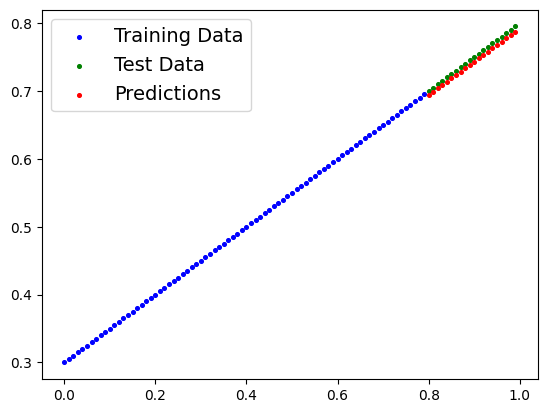

In [51]:
plot_predictions(X_train, X_test, Y_train, Y_test, predictions=Y_pred)

model_0.state_dict()

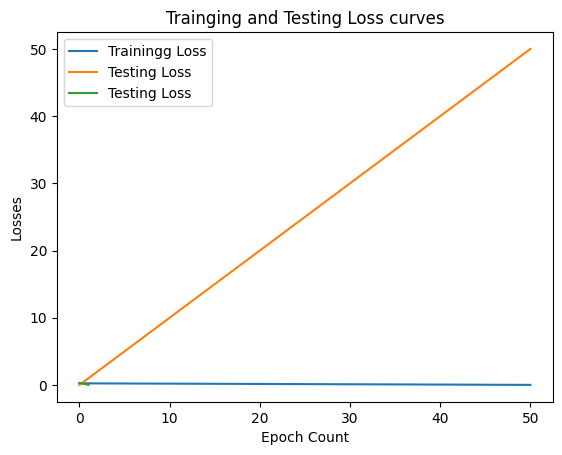

In [53]:
import numpy as np
plt.close()
plt.plot(epoch_count,np.array(torch.tensor(training_loss_values).numpy()), label ="Training Loss")
plt.plot(epoch_count,epoch_count,testing_loss_values, label = "Testing Loss")
plt.title("Trainging and Testing Loss curves")
plt.xlabel("Epoch Count")
plt.ylabel("Losses")
plt.legend()

Saving the model state dictionary and loading

In [66]:
model_0.state_dict()

from pathlib import Path

MODEL_PATH = Path.cwd()/Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME ="01_pytorch_model1.pth"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saving the model in the path ")
MODEL_SAVE_PATH
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)



Saving the model in the path 


Recap of the Entire Workflow of Model Building and Training

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check the Pytorch version
torch.__version__

'1.12.1'

In [3]:
# Check the device availability

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f" Using Device : {device}")

 Using Device : cpu


PREPARE THE DATA

In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X= torch.arange(start, end,step).unsqueeze(dim=1)
Y= weight* X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [5]:
## Prepare training and testing data using split logic


train_split = int(0.8 * len(X))

x_train = X[:train_split]
y_train = Y[:train_split]
x_test = X[train_split:]
y_test = Y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(80, 80, 20, 20)

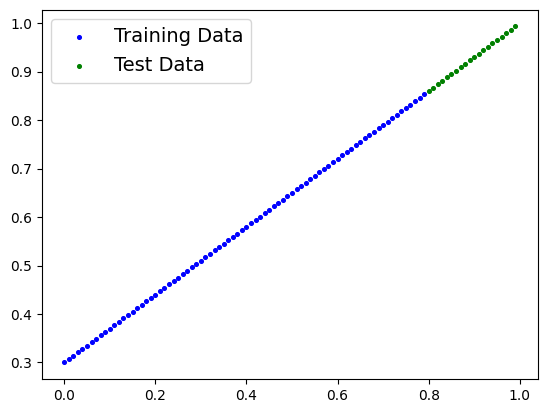

In [6]:
plot_predictions(x_train, x_test, y_train,y_test)

In [8]:
### Building a Regression Model

class RegressionModelv2(nn.Module):
    def __init__(self):
        super().__init__()
        ## use nn.Linear() for creating the model parameters ( also called layers of models)
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = RegressionModelv2()
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [12]:
## Setup a loss function and optimizer to train the model so that the predictions look better. 
## Parameter values get optimized using the training data

loss_function = nn.L1Loss()  ## -> Checks how wrong the model or measures the model accuracy using loss function

optimizer = torch.optim.SGD(model_1.parameters(),lr=0.01)  # Implements stochastic gradient descent as the optimizer to adjust the parameters of the model






In [13]:
### Run the training and testing loop for the model

epochs = 200

for epoch in range(epochs):
    # put the model in training mode
    model_1.train()

    # Execute the forward function for the Training data to predict the output
    y_pred= model_1.forward(x_train)

    # Calculate the loss for thr training data
    loss = loss_function(y_pred, y_train)

    # reset the gradient to zero for every run as model accumulates the gradient
    optimizer.zero_grad()

    # Run the backward propagation so that the model tunes the parameter directions
    loss.backward()

    # Run the optimizer stpe
    optimizer.step()

    ### Testing loop starts
    model_1.eval()

    ## Set the inference mode for better performance
    with torch.inference_mode():
        test_pred = model_1.forward(x_test)

        test_loss = loss_function(test_pred, y_test)

    if epoch % 10 ==0:
        print(f" Training loss is ->: {loss} and Testing loss is ->: {test_loss}")


 Training loss is ->: 0.5555006265640259 and Testing loss is ->: 0.5742346048355103
 Training loss is ->: 0.43989819288253784 and Testing loss is ->: 0.4388822615146637
 Training loss is ->: 0.3242958188056946 and Testing loss is ->: 0.30352982878685
 Training loss is ->: 0.20869341492652893 and Testing loss is ->: 0.16817744076251984
 Training loss is ->: 0.09309100359678268 and Testing loss is ->: 0.0328250378370285
 Training loss is ->: 0.024206461384892464 and Testing loss is ->: 0.04891900345683098
 Training loss is ->: 0.020295290276408195 and Testing loss is ->: 0.04614274203777313
 Training loss is ->: 0.01686828024685383 and Testing loss is ->: 0.03849516063928604
 Training loss is ->: 0.01344125997275114 and Testing loss is ->: 0.030847568064928055
 Training loss is ->: 0.010015219449996948 and Testing loss is ->: 0.022855961695313454
 Training loss is ->: 0.006589989177882671 and Testing loss is ->: 0.014520359225571156
 Training loss is ->: 0.003164681838825345 and Testing 

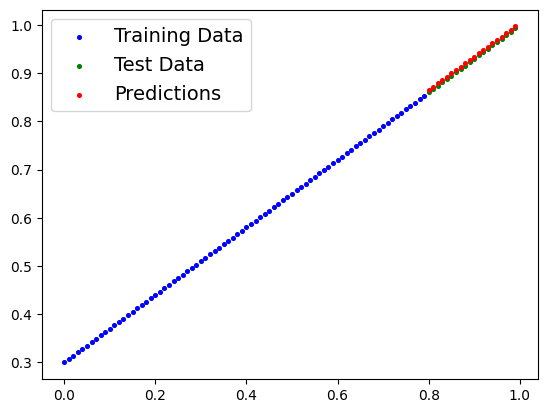

In [14]:
## Evaluate the model using the trained model
model_1.eval()

with torch.inference_mode():
    y_pred = model_1(x_test)

## Check the model predictions visually
plot_predictions(x_train, x_test, y_train, y_test, y_pred)